In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import seaborn as sns

In [2]:
def load_dataset(save=False):
  """
  This fuction is meant to be exported so this is why here download part repeats itself.
  """
  url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
  r = requests.get(url, allow_redirects=True)
  open('wdbc.data', 'wb').write(r.content)

  names = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

  df = pd.read_csv("wdbc.data", header=None, na_values="?", names=names)
  # df['diagnosis'].values[df['diagnosis'].values == "M"] = 1
  # df['diagnosis'].values[df['diagnosis'].values == "B"] = 0
  # df['diagnosis'] = df['diagnosis'].astype('category')

  # df.dropna(inplace=True)
  if save:
    df.to_csv("wisconsin.csv",index=False)

  return df


df = load_dataset()

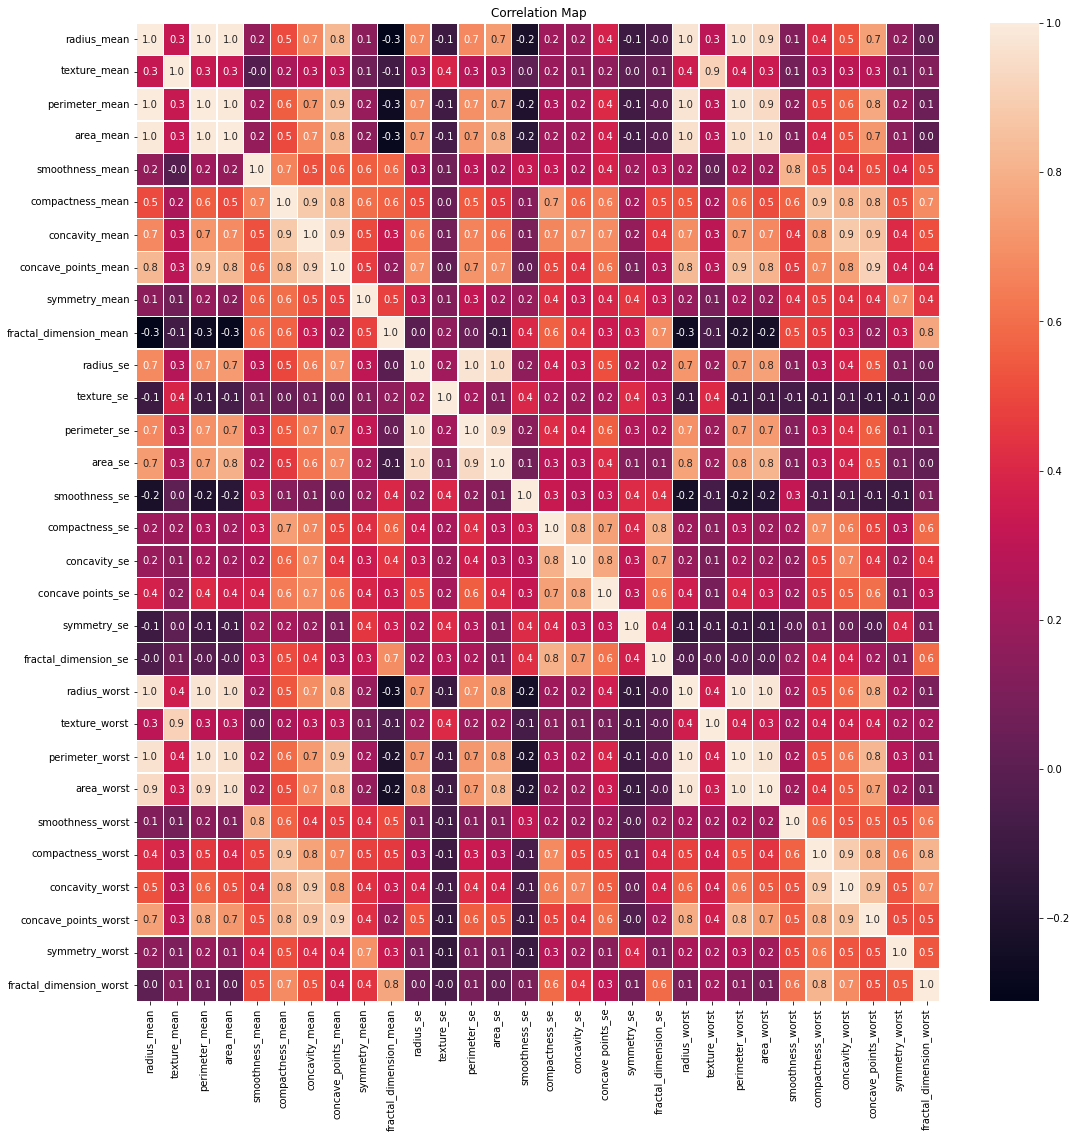

In [3]:
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(df.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.savefig('graph.png')
plt.show()

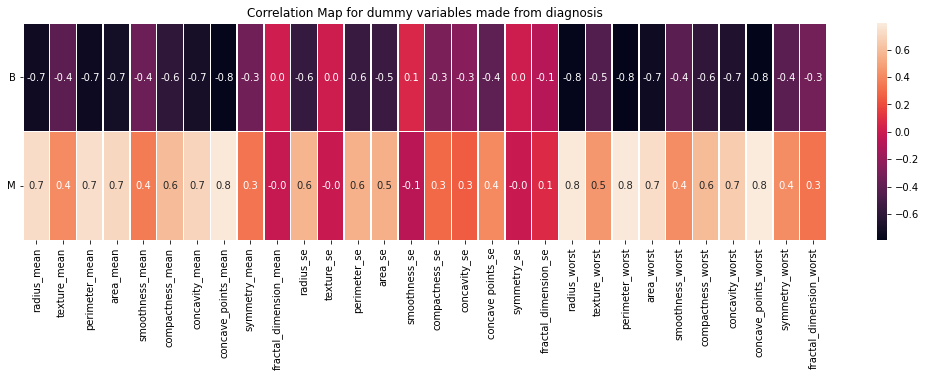

In [4]:
df_dummies = pd.get_dummies(df['diagnosis'])
data = pd.concat([df_dummies, df], axis=1).drop(labels=["diagnosis"],axis=1)

f,ax=plt.subplots(figsize = (18,4))
sns.heatmap(data.corr().iloc[:2].drop(labels=["B","M"],axis=1),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map for dummy variables made from diagnosis')
plt.savefig('graph.png')
plt.show()

In [5]:
print(df.describe().T.drop(labels=["count"],axis=1).to_latex(float_format="{:0.2f}".format))

\begin{tabular}{lrrrrrrr}
\toprule
{} &   mean &    std &    min &    25\% &    50\% &     75\% &     max \\
\midrule
radius\_mean             &  14.13 &   3.52 &   6.98 &  11.70 &  13.37 &   15.78 &   28.11 \\
texture\_mean            &  19.29 &   4.30 &   9.71 &  16.17 &  18.84 &   21.80 &   39.28 \\
perimeter\_mean          &  91.97 &  24.30 &  43.79 &  75.17 &  86.24 &  104.10 &  188.50 \\
area\_mean               & 654.89 & 351.91 & 143.50 & 420.30 & 551.10 &  782.70 & 2501.00 \\
smoothness\_mean         &   0.10 &   0.01 &   0.05 &   0.09 &   0.10 &    0.11 &    0.16 \\
compactness\_mean        &   0.10 &   0.05 &   0.02 &   0.06 &   0.09 &    0.13 &    0.35 \\
concavity\_mean          &   0.09 &   0.08 &   0.00 &   0.03 &   0.06 &    0.13 &    0.43 \\
concave\_points\_mean     &   0.05 &   0.04 &   0.00 &   0.02 &   0.03 &    0.07 &    0.20 \\
symmetry\_mean           &   0.18 &   0.03 &   0.11 &   0.16 &   0.18 &    0.20 &    0.30 \\
fractal\_dimension\_mean  &   0.06 &   0.01 

In [6]:
def plot_histo(column):
  m = plt.hist(df[df["diagnosis"] == "M"][column],bins=30,fc = (1,0,0,0.5),label = "Malignant")
  b = plt.hist(df[df["diagnosis"] == "B"][column],bins=30,fc = (0,1,0,0.5),label = "Bening")
  plt.legend()
  colname=column.replace("_", " ").title()
  print(colname)
  plt.xlabel(f"{colname} Values")
  plt.ylabel("Frequency")
  plt.title(f"Histogram of {colname} for Bening and Malignant Tumors")
  plt.show()
  

Perimeter Worst


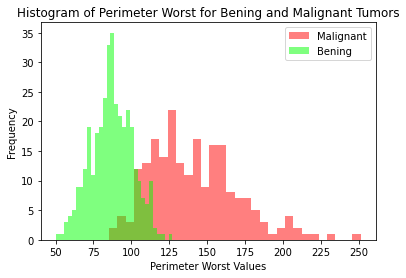

Concave Points Worst


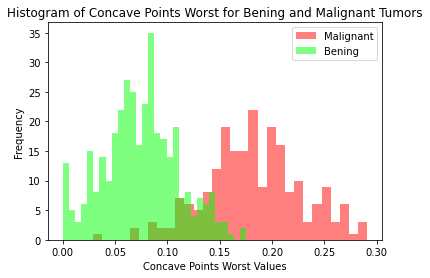

Radius Worst


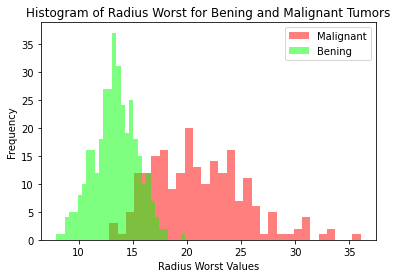

Concave Points Mean


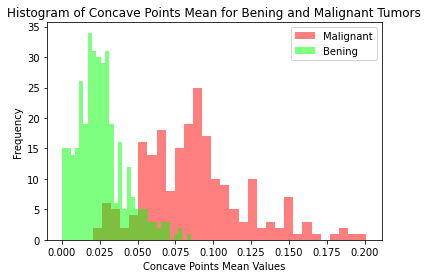

In [7]:
for feature in ["perimeter_worst","concave_points_worst", "radius_worst", "concave_points_mean"]:
  plot_histo(feature)

Diagnosis


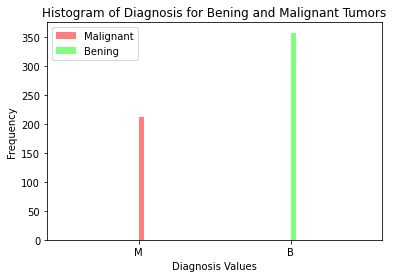

Radius Mean


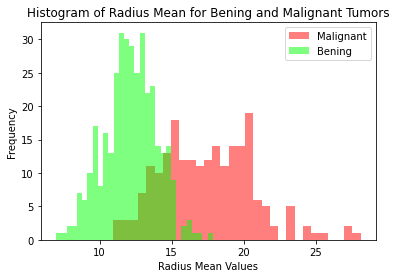

Texture Mean


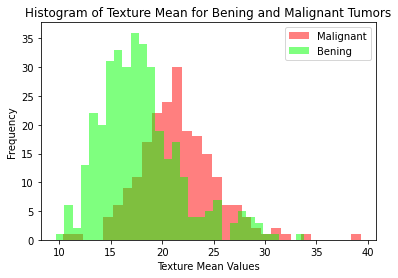

Perimeter Mean


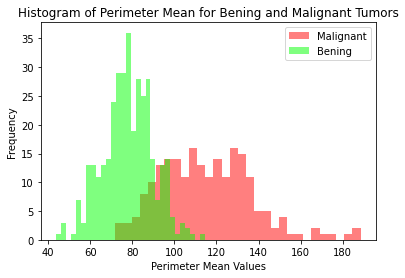

Area Mean


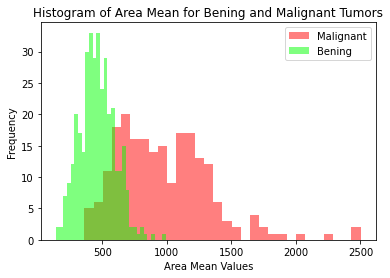

Smoothness Mean


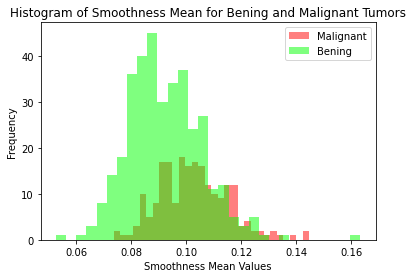

Compactness Mean


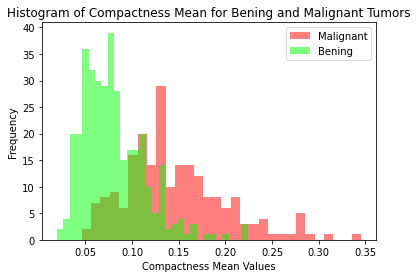

Concavity Mean


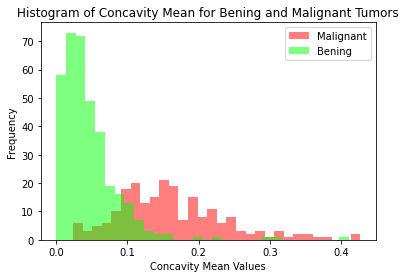

Concave Points Mean


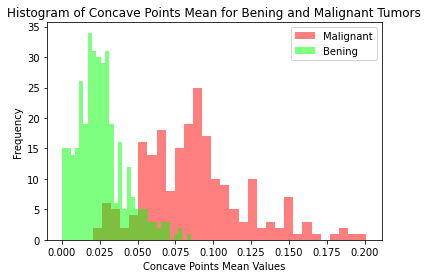

Symmetry Mean


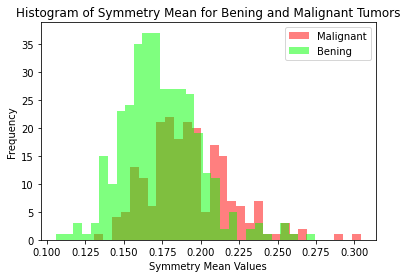

Fractal Dimension Mean


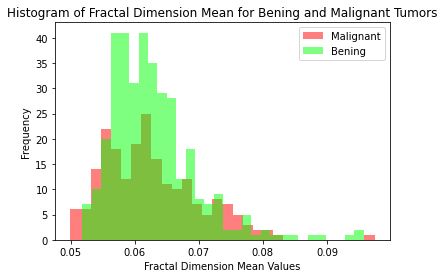

Radius Se


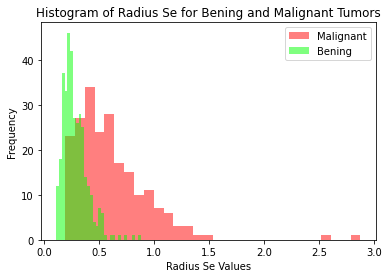

Texture Se


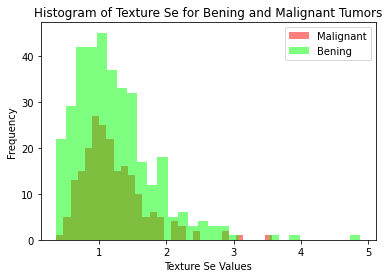

Perimeter Se


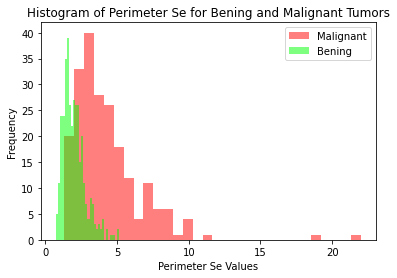

Area Se


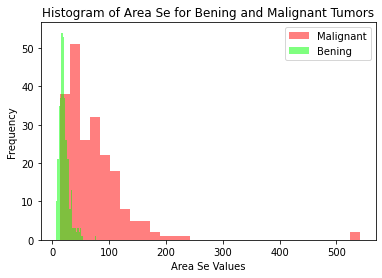

Smoothness Se


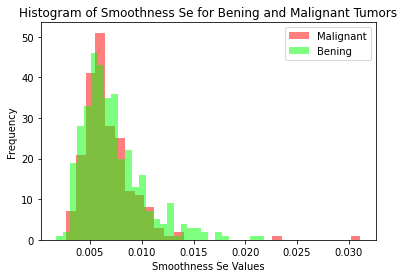

Compactness Se


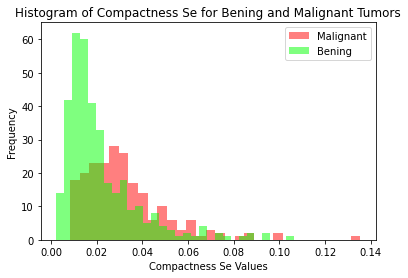

Concavity Se


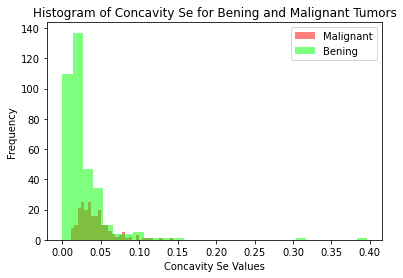

Concave Points Se


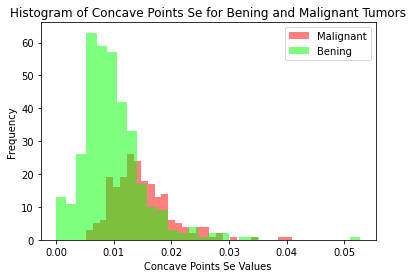

Symmetry Se


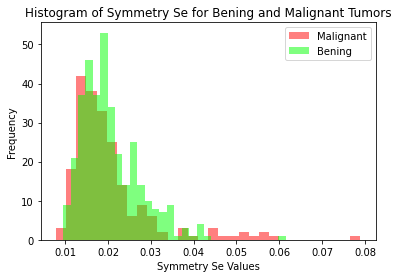

Fractal Dimension Se


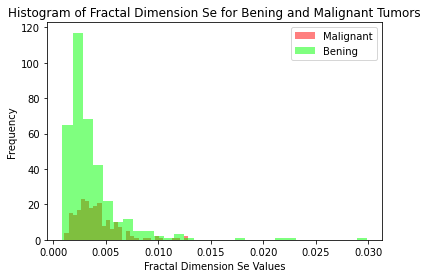

Radius Worst


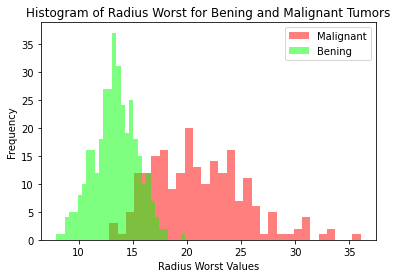

Texture Worst


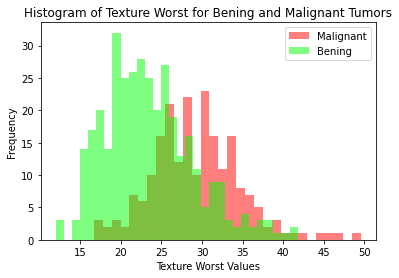

Perimeter Worst


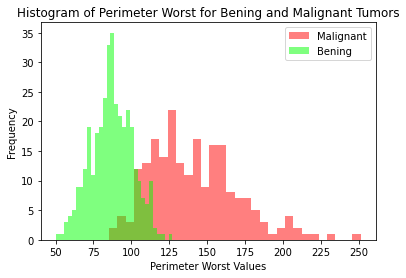

Area Worst


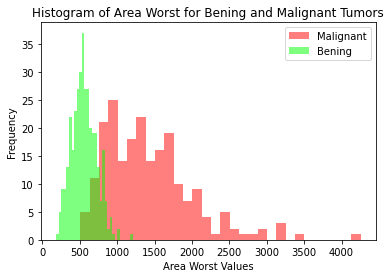

Smoothness Worst


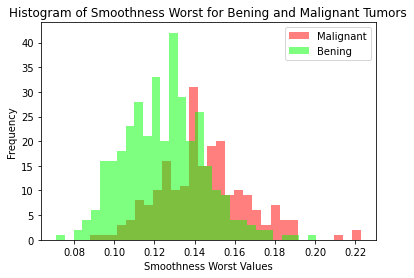

Compactness Worst


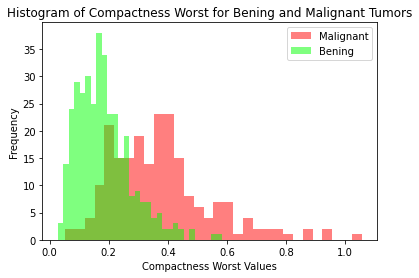

Concavity Worst


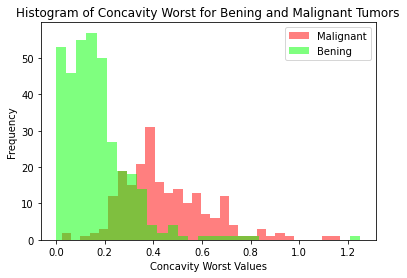

Concave Points Worst


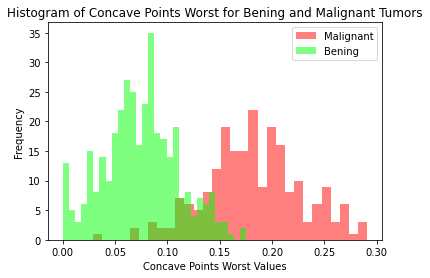

Symmetry Worst


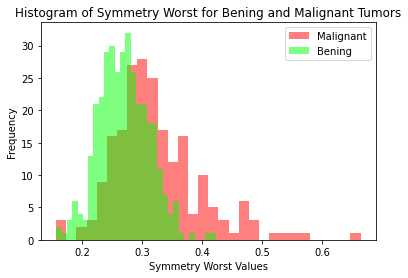

Fractal Dimension Worst


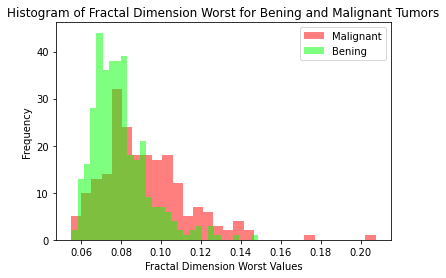

In [8]:
for feature in df.columns:
  plot_histo(feature)